In [1]:
import random # for random value
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting 
from PIL import Image # Image processing
import json  #json file I/O
#from mpl_toolkits.basemap import Basemap

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import SGD
import keras.callbacks

import sys

In [4]:
from PIL import Image, ImageDraw 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
BDIR = '/content/drive/MyDrive/CommonFiles/MUSA650-Data/Prj_Shipsnet'
with open(BDIR + '/shipsnet.json') as data_file:
    data = json.load(data_file)
Shipsnet= pd.DataFrame(data)
print(Shipsnet.head())
print(Shipsnet.shape)

                                                data  labels  \
0  [82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...       1   
1  [76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...       1   
2  [125, 127, 129, 130, 126, 125, 129, 133, 132, ...       1   
3  [102, 99, 113, 106, 96, 102, 105, 105, 103, 10...       1   
4  [78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...       1   

                                   locations             scene_ids  
0    [-118.2254694333423, 33.73803725920789]  20180708_180909_0f47  
1    [-122.33222866289329, 37.7491755586813]  20170705_180816_103e  
2  [-118.14283073363218, 33.736016066914175]  20180712_211331_0f06  
3   [-122.34784341495181, 37.76648707436548]  20170609_180756_103a  
4   [-122.34852408322172, 37.75878462398653]  20170515_180653_1007  
(4000, 4)


In [8]:
input_data = np.array(data['data']).astype('uint8')
output_data = np.array(data['labels']).astype('uint8')

In [9]:
input_data.shape


(4000, 19200)

In [10]:
n_spectrum = 3 # color channel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X.shape

(4000, 3, 80, 80)

In [12]:
# get one channel
pic = X[0]

red_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectrum = pic[2]

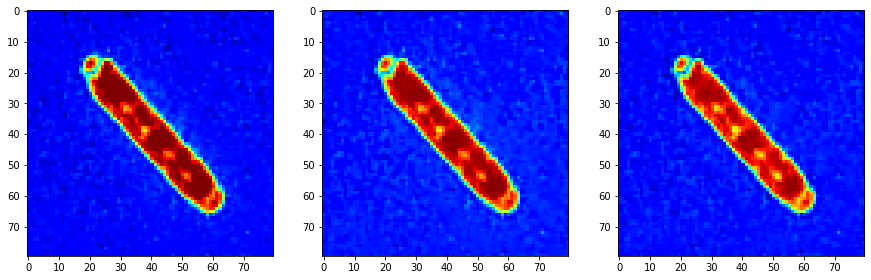

In [13]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(red_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectrum)
    
plt.show()


In [14]:
y = np_utils.to_categorical(output_data, 2)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [15]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [16]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [17]:
X_train = X_train / 255


In [18]:
X_train.shape

(2800, 80, 80, 3)

In [19]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

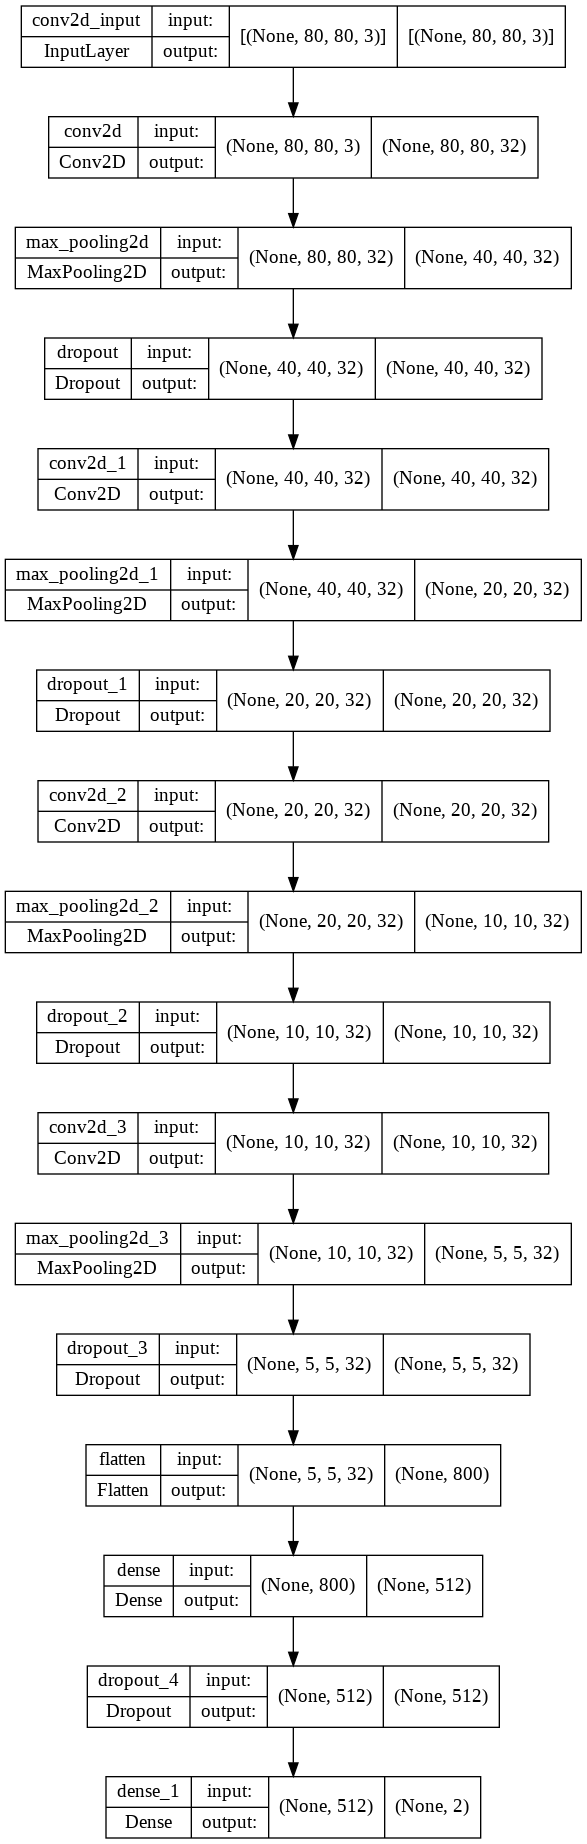

In [21]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [25]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [26]:
model.layers

In [27]:
  len(model.get_weights()[0][0][0][0])

32

In [ ]:
# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=18,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Epoch 1/18
70/70 - 27s - loss: 0.3746 - accuracy: 0.8371 - val_loss: 0.1511 - val_accuracy: 0.9464 - 27s/epoch - 391ms/step
Epoch 2/18
70/70 - 28s - loss: 0.1434 - accuracy: 0.9522 - val_loss: 0.1055 - val_accuracy: 0.9625 - 28s/epoch - 393ms/step
Epoch 3/18
70/70 - 26s - loss: 0.1095 - accuracy: 0.9679 - val_loss: 0.0900 - val_accuracy: 0.9679 - 26s/epoch - 376ms/step
Epoch 4/18


In [ ]:
image = Image.open(BDIR + '/scenes/scenes/sfbay_1.png')
pix = image.load()

In [ ]:
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [ ]:
picture_vector = []
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            picture_vector.append(pix[x, y][chanel])

In [ ]:
picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0) 

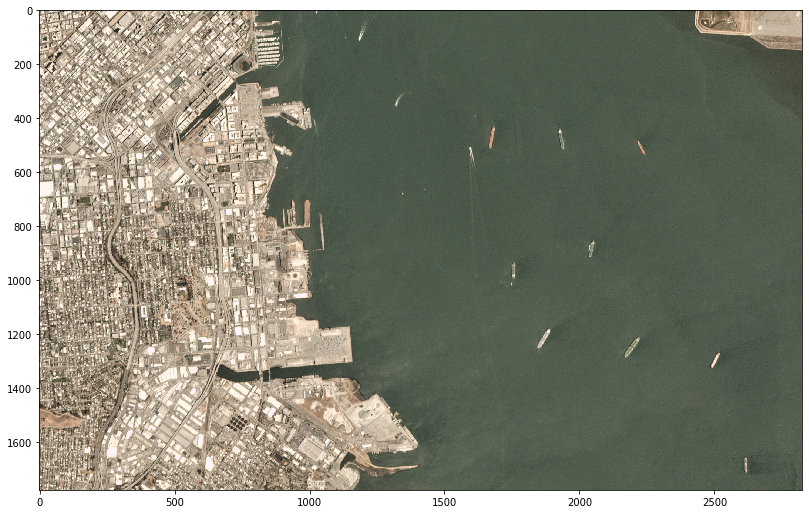

In [ ]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [ ]:
picture_tensor = picture_tensor.transpose(2,0,1)


In [ ]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [ ]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [ ]:
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:2400 Y:0  [[0.09364419 0.90635574]]


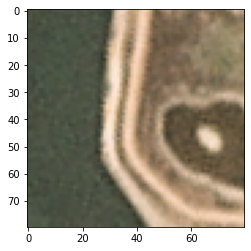

X:1890 Y:420  [[8.359907e-04 9.991640e-01]]


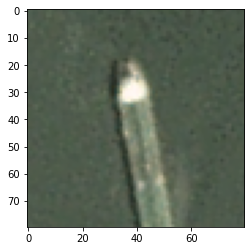

X:2190 Y:480  [[0.04651377 0.95348626]]


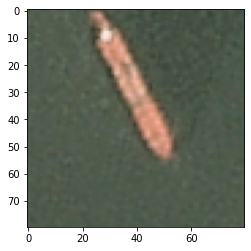

X:900 Y:690  [[0.03423841 0.9657616 ]]


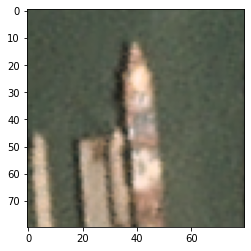

X:1710 Y:960  [[0.00296284 0.9970372 ]]


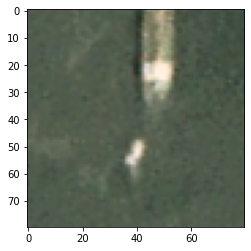

X:1830 Y:1170  [[7.3681993e-04 9.9926323e-01]]


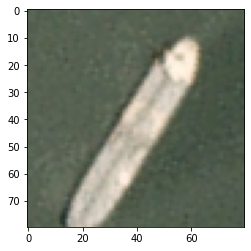

X:2160 Y:1200  [[0.00349988 0.99650013]]


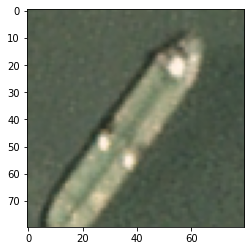

X:2460 Y:1260  [[8.5896150e-05 9.9991405e-01]]


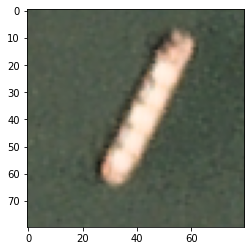

X:1290 Y:1650  [[0.04953291 0.9504671 ]]


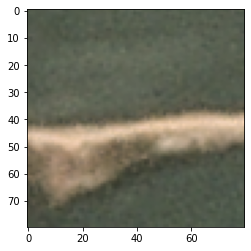

X:2580 Y:1650  [[7.3352497e-04 9.9926645e-01]]


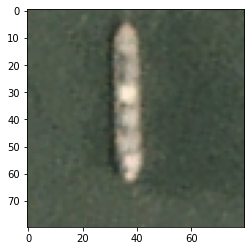

X:2730 Y:1680  

In [ ]:
step = 30; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

In [ ]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [ ]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1777, 2825, 3)

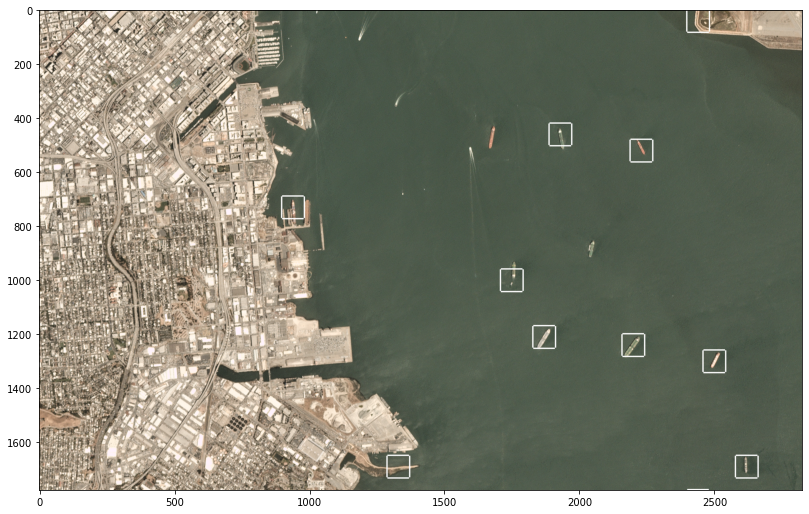

In [ ]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()